# Resolución de examen PEIA 2020 - Nicolás Eduardo Horro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.stats as stats
from scipy.stats import norm, geom,t
init_printing(use_unicode=True)

### Ejercicio 1

Una máquina que produce fósforos tiene una proporción de defecto aleatoria de 1%.

(a) Encontrar la máxima cantidad de fósforos, N , que se pueden ensamblar en una misma caja de
manera tal que la probabilidad de tener uno o más fósforos defectuosos sea menor a 0.5.

**Respuesta**:

Este problema se puede modelar con una distribución geométrica considerando como "ensayo" cada fósforo agregado a la caja y como "evento de éxito" que el fósforo sea defectuoso. Asignamos a este evento de éxito una probabilidad de 0.01.

Si graficamos la CDF vemos que conforme aumenta la cantidad de intentos (fósforos agregados a una caja) aumenta también la probabilidad de que algunos de los fósforos agregados sean defectuosos.

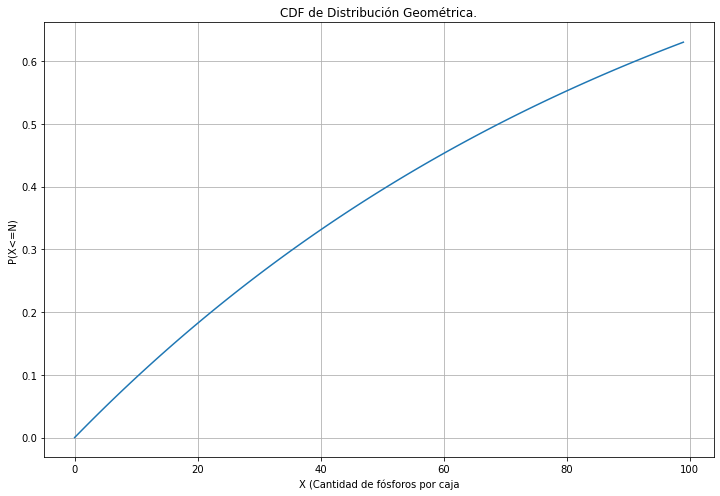

In [2]:
n = np.arange(100)
p = geom.cdf(n,p=0.01)
plt.figure(figsize=(12,8))
plt.plot(n,p)
plt.grid(which="Both")
plt.title("CDF de Distribución Geométrica.")
plt.xlabel("X (Cantidad de fósforos por caja")
plt.ylabel("P(X<=N)")
plt.show()

Se desea obtener el valor de $N$ para el cuál $P(X=N) = 0.5$, y se considerará este número como el máximo número de fósforos por caja permitidos para cumplir con la premisa.

Este valor se puede obtener por la fórmula cerrada:

Si $X$ es la V.A. que representa el evento de que el n-ésimo fósforo sea defectuoso y $p=0.01$ es la probabilidad de que un fósforo sea defectuoso y $q=1-p$ entonces:

$$
P(X \le N) = 1-q^N\\
$$

$$
\frac{1}{2} = 1-q^N\\
$$

$$
\therefore N=\lfloor log_q(\frac{1}{2})=\frac{log(-\frac{1}{2})}{log(q)} \rfloor = \lfloor 68.967 \rfloor = 68
$$

In [3]:
n = np.floor(np.log(0.5)/log(1-0.01))
n

<hr/>

(b) Encontrar el valor esperado y el desvı́o estándar de la cantidad de fósforos defectuosos para el N
calculado en el punto (a).

**Respuesta**:

Siendo fijo el número de ensayos, se puede modelar el problema con una distribución Bernoulli con $n=68$ y $p=0.01$:

$$
\mu = np
$$

$$
\sigma = \sqrt{np(1-p)}
$$

In [4]:
n = 68
p = 0.01
mu_teorico = n * p
sigma_teorico = sqrt(n*p*(1-p))
print("Promedio Teórico: %f" % mu_teorico)
print("Desvío Estándar Teórico: %f" % sigma_teorico)

Promedio Teórico: 0.680000
Desvío Estándar Teórico: 0.820488


<hr/>

(c) Simular el experimento y verificar los resultados obtenidos en los puntos (a) y (b). Comparar con
los resultados teóricos esperados.

**Respuesta**:

El siguiente método realiza un experimento de generar cajas de *n_samples* fósforos con una probabilidad de defecto *prob_defect* una cantidad de veces *n_iterations* y devuelve:
- Porcentaje de cajas c/ defectos (0-1).
- Promedio de fósforos defectuosos por caja.
- Desvío estándard de fósforos defectuosos por caja.

In [5]:
def simulate_experiment1(n_iterations,n_samples,prob_defect):
    boxes_with_defects = 0
    q_defective_matches_per_box = np.zeros(n_iterations)

    for i in range(n_iterations):    
        samples = np.random.uniform(0,1,n_samples)    
        faulty = (samples > (1.0-prob_defect))    
        has_defect = np.count_nonzero(faulty)>0
        boxes_with_defects += 1 if has_defect else 0 
        q_defective_matches_per_box[i] = np.count_nonzero(faulty)
    return (boxes_with_defects/n_iterations), q_defective_matches_per_box.mean(), q_defective_matches_per_box.std()

Primero se evaluará la función para $N=0...100$ y se la comparará con la CDF de la distribución geométrica y se cargará cada probabilidad en un vector.
Luego se buscará en este vector el primer $N$ más próximo a 0.5 por izquierda.

In [6]:
n_iterations = 10000 # Cantidad de iteraciones por cada N ensayado
n_trials = 1000       # Número máximo de ensayos=cantidad máxima de fósforos probada
prob_defect = 0.01   # Probabilidad de que un fósforo sea defectuoso

x = np.arange(n_trials)
y = np.zeros(n_trials)

for i in range(n_trials):
    y[i], _, _ = simulate_experiment1(n_iterations,i,prob_defect)
        
q_above_accepted_failure = np.argmax(y > 0.5)-1
q_above_accepted_failure
print("N encontrado por simulación: %d" % q_above_accepted_failure)

N encontrado por simulación: 68


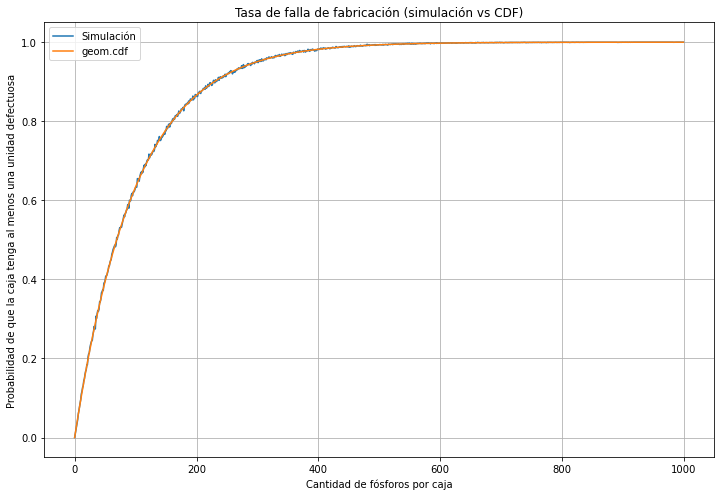

In [7]:
plt.figure(figsize=(12,8))
plt.plot(x,y)   
plt.plot(x,geom.cdf(x,p=0.01))
plt.grid(which="Both")
plt.title("Tasa de falla de fabricación (simulación vs CDF)")
plt.xlabel("Cantidad de fósforos por caja")
plt.ylabel("Probabilidad de que la caja tenga al menos una unidad defectuosa")
plt.legend(["Simulación","geom.cdf"])

Finalmente se evaluará para N=68 y se comprobará que los valores obtenidos para el promedio y desvío estándar se aproximan muy bien a los teóricos.

In [8]:
n_samples = 68
n_iterations = 100000  # Cantidad de iteraciones por cada N ensayado
n_trials = 100       # Número máximo de ensayos=cantidad máxima de fósforos probada
prob_defect = 0.01   # Probabilidad de que un fósforo sea defectuoso
defect_prob, q_defective_mean, q_defective_matches_std = simulate_experiment1(n_iterations,n_samples,0.01)
print("Probabilidad de defectuosos: %f" % defect_prob)
print("Promedio de defectuosos: %f" % q_defective_mean)
print("Desvío estándar: %f" % q_defective_matches_std)
print("Promedio Teórico: %f" % mu_teorico)
print("Desvío Estándar Teórico: %f" % sigma_teorico)

Probabilidad de defectuosos: 0.495140
Promedio de defectuosos: 0.678870
Desvío estándar: 0.817181
Promedio Teórico: 0.680000
Desvío Estándar Teórico: 0.820488


### Ejercicio 2

Sea $X$ una variable aleatoria con función de densidad de probabilidad (pdf) $f_X(x) = kx$, si $0 \le x \le 3$, y $f_X(x) = 0$ si no.

(a) Encontrar el valor de k.

**Respuesta**:

Como $f_X(x) = 0$ fuera del intervalo $[0,3]$ sólo se estudiará este intervalo.

Interesa hallar el valor de $k$ para el cuál la CDF evaluada en 3 es 1. Por lo tanto:

$$
\int_0^3{kx}dx = \int_0^3{x}dx = \left.\frac{k}{2}x^2\right|_{3} - \left.\frac{k}{2}x^2\right|_{0} = \frac{9k}{2}
$$

$$
\frac{9k}{2} = 1 \therefore k = \frac{2}{9}
$$

<hr/>

(b) Encontrar $x_1$ tal que $P(X \le x_1 ) = 0.1$.

**Respuesta**:

$$
P(X \le x_1 ) = \int_0^{x_1}{\frac{2}{9}x}dx = \frac{x_1^2}{9} 
$$

$$
\frac{x_1^2}{9} = 0.1 \therefore x_1 = \sqrt{0.9}
$$

<hr/>

(c) Simular la variable aleatoria $X$ usando el método de la transformada inversa.

**Respuesta**:

Dado que $F_X^{-1}$ existe, se puede plantear:

$$
U = F_X(x) = \frac{x^2}{9}
$$

Entonces:

$$
X = \sqrt{9U}
$$

In [9]:
def inverse_transform_rv(n_samples):
    U = np.random.uniform(0,1,n_samples)
    X = np.sqrt(9*U)
    return X

<hr/>

(d) A partir de la variable $X$ generada, estimar -mediante simulaciones- la pdf de $X$ usando método
de densidad de kernel con función de kernel Gaussiana.

**Respuesta**:

A continuación se muestra el gráfico de la función aproximada utilizando el método de densidad de Kernel comparándola con la función original y se comparan la media y varianza teórica con la muestral.

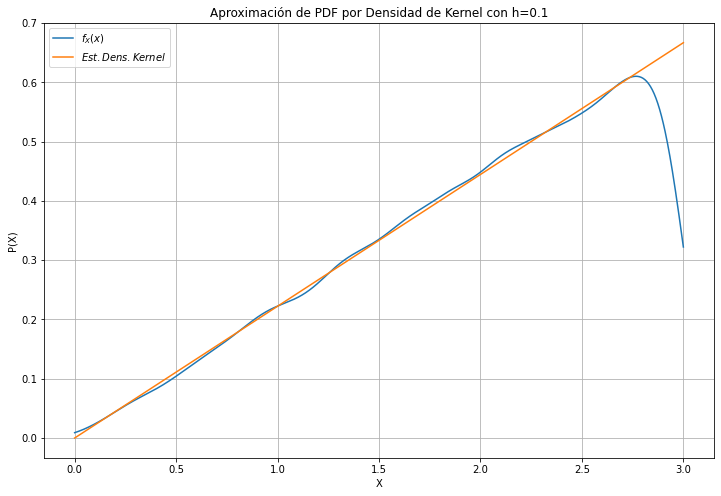

In [18]:
n_iterations = 10000  # Número de simulaciones
n_samples = 1000 # Simulaciones de la variable independiente

X = inverse_transform_rv(n_iterations)
x = np.linspace(0,3,n_samples)

# Constante de filtrado y dispersión de la Gaussiana
h = 0.1
p = np.zeros(x.shape)

for i in range(n_iterations):
    for j in range(x.shape[0]):
        K = ( 1 / np.sqrt(2*np.pi) ) * np.exp( -(1/2)*((X[i]-x[j] ) / h )**2 )
        p[j] = p[j] + (1/(n_iterations*h))*K
        
plt.figure(figsize=(12,8))
plt.title("Aproximación de PDF por Densidad de Kernel con h=0.1")
plt.plot(x,p)   
plt.plot(x,(2/9)*x)
plt.grid(which="Both")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.legend(["$f_X(x)$","$Est. Dens. Kernel$",])

In [11]:
x = symbols("x")
mu = integrate(x*Rational(2,9)*x,(x,0,3))
sigma2 = integrate((x**2)*Rational(2,9)*x,(x,0,3)) - mu**2
mu_hat = X.mean()
sigma2_hat = X.var()
print("Media teórica:", mu)
print("Varianza teóríca:", sigma2)
print("Media muestral:", mu_hat)
print("Varianza muestral:", sigma2_hat)

Media teórica: 2
Varianza teóríca: 1/2
Media muestral: 1.987668805141544
Varianza muestral: 0.5182517615716415


### Ejercicio 3

Sea $X_1, X_2,...,X_{10}$ una muestra aleatoria de una población con distribución normal con media $\mu$ y
desvı́o estándar 4. Sea $\hat{X}$ la media muestral. Se mide $\hat{X}$ = 48. Se tiene la hipótesis nula $H_0: \mu = 45$, y la hipótesis alternativa $H_1: \mu \neq 45$.

(a) Encontrar un intervalo de confianza del 95 % de $\mu$.

**Respuesta**:

In [12]:
N = 10
std_dev = 4  # Desvío estandard característico (dato).
mu_hat = 48 # Media muestral (dato)

In [13]:
alpha = (1- 0.95) 
z_norm = norm.ppf(1-alpha/2)

In [14]:
z_norm

   
El intervalo de confianza del 95% (Normal) es:

In [15]:
z = z_norm
mu_min_teorico = mu_hat-(z*std_dev/np.sqrt(N))
mu_max_teorico = mu_hat+(z*std_dev/np.sqrt(N))
(mu_min_teorico,mu_max_teorico)

<hr/>

(b) Justificar si hay suficiente evidencia para rechazar la hipótesis nula con un 5% de significancia.

**Respuesta**:
    
Dado que la hipótesis $\mu=45$ está fuera del intervalo de confianza del 95% la misma se rechaza.

<hr/>

(c) Simular el experimento y verificar los resultados obtenidos en los puntos (a) y (b).

**Respuesta**:
    
El valor de confianza encontrado por simulación ~0.95 coincide con el 95% esperado.

In [16]:
def simulate_htest(pop_mean, pop_stddev,n_iterations = 10000):
    print(f"Simulación para media: {pop_mean} std_dev: {pop_stddev}")
    
    confidence = 0
    sample_mean = 0
    sample_var = 0
    sample_stdev = 0    
    for i in range(n_iterations):        
        X = pop_stddev/np.sqrt(N)*np.random.normal(size=N) + pop_mean;        
        confidence = confidence + (1/(n_iterations*N)) * np.count_nonzero( 
            (X >= mu_min_teorico) & (X <= mu_max_teorico) )            
        sample_mean = sample_mean + X.mean()
        sample_var = sample_var + X.var()
        sample_stdev = sample_stdev + X.std()
    sample_mean = sample_mean / n_iterations
    sample_var = sample_var / n_iterations
    sample_stdev = sample_stdev / n_iterations

    print("Confianza: ", confidence)
    print("Media muestral: ", sample_mean)
    print("Varianza muestral: ", sample_var)
    print("Desvío estándard muestral: ", sample_stdev)

In [17]:
simulate_htest(pop_mean=48.0,pop_stddev=4.0)

Simulación para media: 48.0 std_dev: 4.0
Confianza:  0.9501799999999755
Media muestral:  47.99654557474543
Varianza muestral:  1.447981257138375
Desvío estándard muestral:  1.1704614886083702


In [20]:
simulate_htest(pop_mean=45.0,pop_stddev=4.0)

Simulación para media: 45.0 std_dev: 4.0
Confianza:  0.3391599999999944
Media muestral:  44.999778702243155
Varianza muestral:  1.4448187581262892
Desvío estándard muestral:  1.168521874473351
